In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import os
from sklearn.cluster import KMeans
from pandas import plotting
plt.rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')
dir_path =r'C:\Users\Lenovo\Documents'
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep=';', header=None,engine='python')
imports = get_files(dir_path=dir_path, filename='generated_imports.csv')
exports= get_files(dir_path=dir_path, filename='generated_exports.csv')
exports.columns=['id','Bill Year','Month Name','Bill Type Desc Eng','Country Code Eng','Bill Cntry To Eng','Bill Harm Code','Sit Full Desc Eng','Bill Amount','Bill Weight','Imp Desc Eng','Imp Municip Code','Stat Emirate Arb']
imports.columns=['id','Bill Year','Month Name','Bill Type Desc Eng','Country Code Eng','Bill Harm Code','Sit Full Desc Eng','Bill Amount','Bill Weight','Imp Desc Eng','Imp Municip Code']
a=exports.head()
b=imports.head()
companies=get_files(dir_path=dir_path, filename='companies.csv')
companies.columns=['Imp Municip Code','Imp Desc Eng','activity_code','DOMAIN']
print(companies.head())
print(companies.shape)
print(imports.head())
print(imports.head())
print(companies.shape)
df=pd.DataFrame()
df=companies.merge(imports, on='Imp Municip Code')


   Imp Municip Code                            Imp Desc Eng  activity_code  \
0  Imp Municip Code                            Imp Desc Eng  activity_code   
1        IN-1001497  EMIRATES ALUMINUM COMPANY LIMITED PJSC        2200976   
2        IN-1000114                EXEED GLASS WOOL L. L. C        2289479   
3        IN-1000490        GULF PIPING CO LLC INDUSTRIAL BR        2200976   
4        IN-1000532    NATIONAL FOOD PRODUCTS COM MILCO LLC        2030530   

   DOMAIN  
0  DOMAIN  
1  METALS  
2   STONE  
3  METALS  
4    FOOD  
(18, 4)
   id  Bill Year Month Name Bill Type Desc Eng Country Code Eng  \
0   0       2016    January             Import          AUSTRIA   
1   1       2016    January             Import        AUSTRALIA   
2   2       2016    January             Import        AUSTRALIA   
3   3       2016    January             Import           FRANCE   
4   4       2016    January             Import            CHINA   

   Bill Harm Code                               

In [16]:
df.head()

,Imp Municip Code,Imp Desc Eng_x,activity_code,DOMAIN,id,Bill Year,Month Name,Bill Type Desc Eng,Country Code Eng,Bill Harm Code,Sit Full Desc Eng,Bill Amount,Bill Weight,Imp Desc Eng_y
0,IN-1001497,EMIRATES ALUMINUM COMPANY LIMITED PJSC,2200976,METALS,0,2016,January,Import,AUSTRIA,720712,Iron or non-alloy steel; semi-finished product...,4712275,4155746,EMIRATES ALUMINUM COMPANY LIMITED PJSC
1,IN-1001497,EMIRATES ALUMINUM COMPANY LIMITED PJSC,2200976,METALS,1,2016,January,Import,AUSTRALIA,760691,"Aluminium; plates, sheets and strip, thickness...",2941238,5205599,EMIRATES ALUMINUM COMPANY LIMITED PJSC
2,IN-1001497,EMIRATES ALUMINUM COMPANY LIMITED PJSC,2200976,METALS,2,2016,January,Import,AUSTRALIA,760612,"Aluminium; plates, sheets and strip, thickness...",3996025,5235854,EMIRATES ALUMINUM COMPANY LIMITED PJSC
3,IN-1001497,EMIRATES ALUMINUM COMPANY LIMITED PJSC,2200976,METALS,3,2016,January,Import,FRANCE,720310,Ferrous products; obtained by direct reduction...,3033648,3900877,EMIRATES ALUMINUM COMPANY LIMITED PJSC
4,IN-1001497,EMIRATES ALUMINUM COMPANY LIMITED PJSC,2200976,METALS,4,2016,January,Import,CHINA,760611,"Aluminium; plates, sheets and strip, thickness...",3606768,3013680,EMIRATES ALUMINUM COMPANY LIMITED PJSC


In [18]:
df=df.drop(['Imp Desc Eng_x', 'id'],axis=1)

In [19]:
df.to_csv('new.csv')
print(df.head())
print(df.shape)
print(df.describe())

print(df['DOMAIN'].unique())
print(df.groupby('DOMAIN').size())

  Imp Municip Code activity_code  DOMAIN  Bill Year Month Name  \
0       IN-1001497       2200976  METALS       2016    January   
1       IN-1001497       2200976  METALS       2016    January   
2       IN-1001497       2200976  METALS       2016    January   
3       IN-1001497       2200976  METALS       2016    January   
4       IN-1001497       2200976  METALS       2016    January   

  Bill Type Desc Eng Country Code Eng  Bill Harm Code  \
0             Import          AUSTRIA          720712   
1             Import        AUSTRALIA          760691   
2             Import        AUSTRALIA          760612   
3             Import           FRANCE          720310   
4             Import            CHINA          760611   

                                   Sit Full Desc Eng  Bill Amount  \
0  Iron or non-alloy steel; semi-finished product...      4712275   
1  Aluminium; plates, sheets and strip, thickness...      2941238   
2  Aluminium; plates, sheets and strip, thickness... 

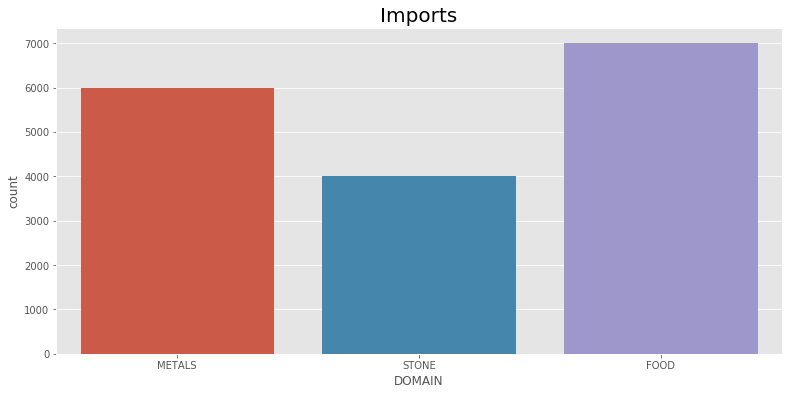

In [20]:
sns.countplot(df['DOMAIN'],label="Count")
plt.title('Imports', fontsize = 20)

plt.show()


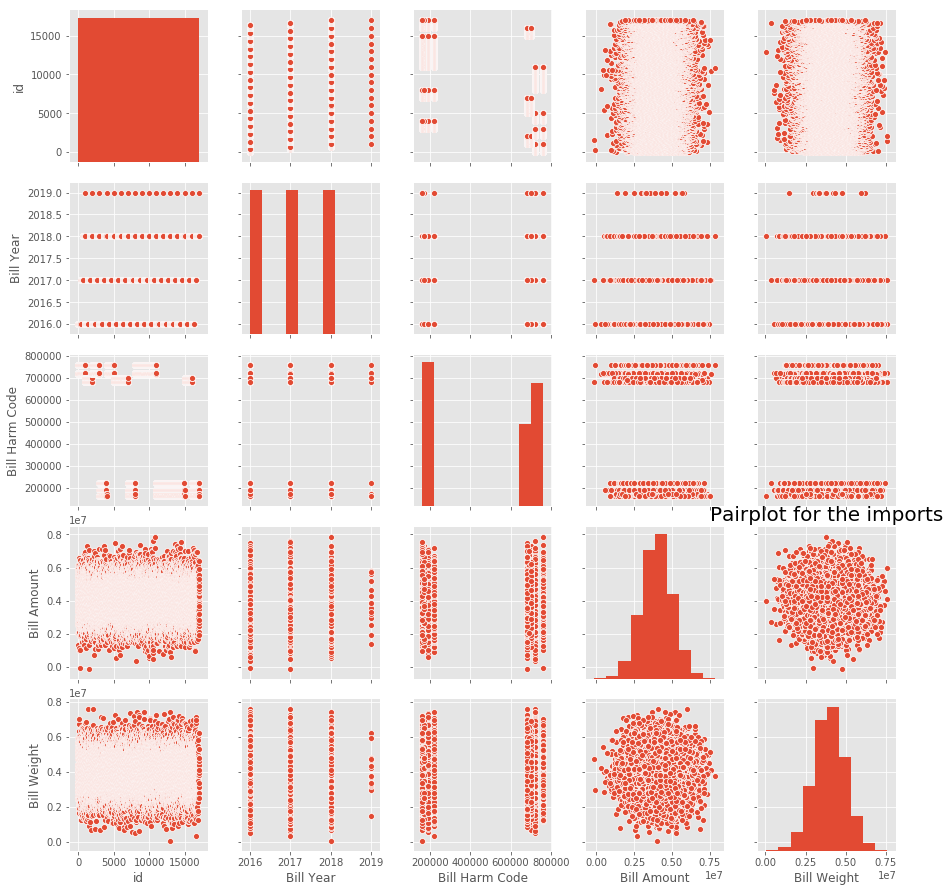

In [21]:
sns.pairplot(imports)
plt.title('Pairplot for the imports', fontsize = 20)
plt.show()


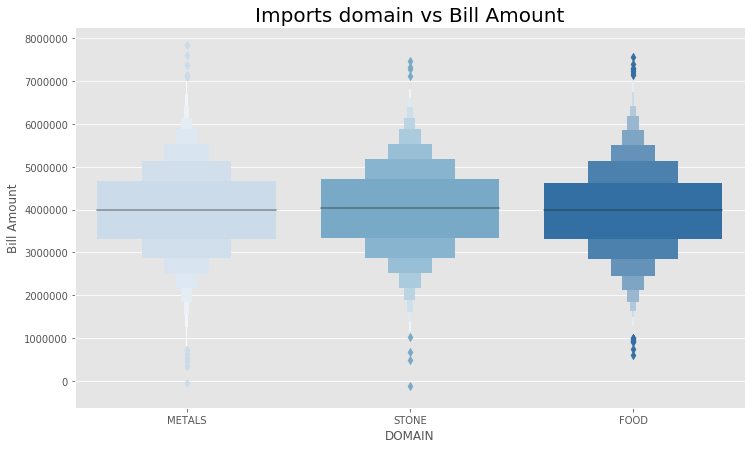

In [22]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.boxenplot(df['DOMAIN'], df['Bill Amount'], palette = 'Blues')
plt.title('Imports domain vs Bill Amount', fontsize = 20)
plt.show()


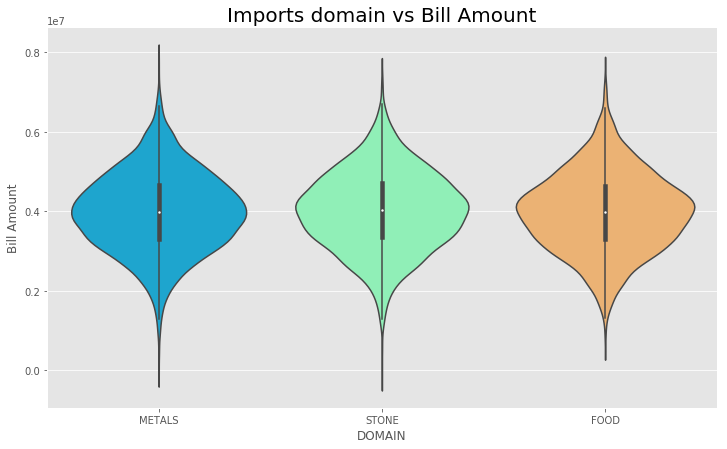

In [23]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.violinplot(df['DOMAIN'], df['Bill Amount'], palette = 'rainbow')
plt.title('Imports domain vs Bill Amount', fontsize = 20)
plt.show()

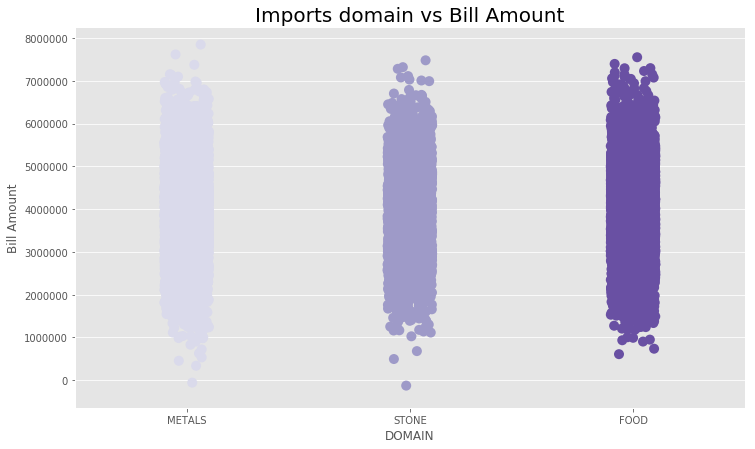

In [24]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.stripplot(df['DOMAIN'], df['Bill Amount'], palette = 'Purples', size = 10)
plt.title('Imports domain vs Bill Amount', fontsize = 20)
plt.show()

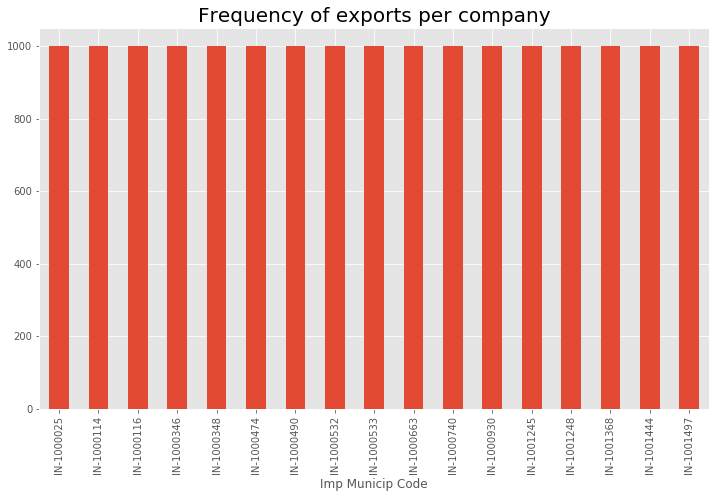

In [27]:
imports.groupby('Imp Municip Code')['Bill Harm Code'].count().plot(kind='bar')
plt.title('Frequency of exports per company', fontsize = 20)
plt.show()

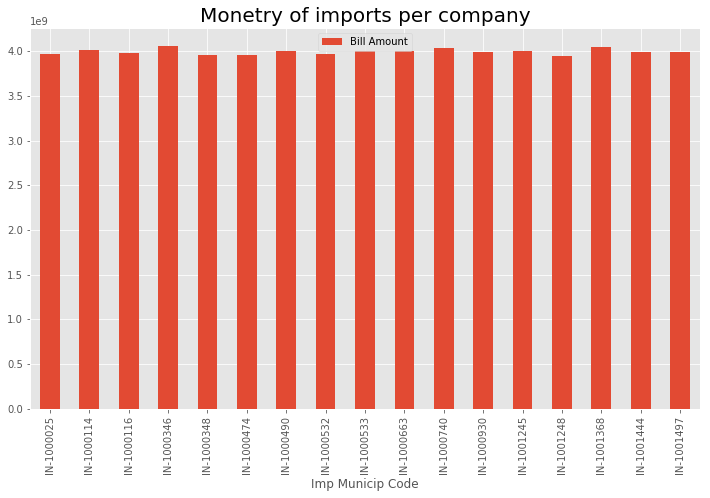

In [28]:
imports.groupby('Imp Municip Code')[['Bill Amount']].sum().plot(kind='bar')
monetryi=imports.groupby('Imp Municip Code')[['Bill Amount']].sum()
monetryi.columns=['Monetry']
plt.title('Monetry of imports per company', fontsize = 20)
plt.show()

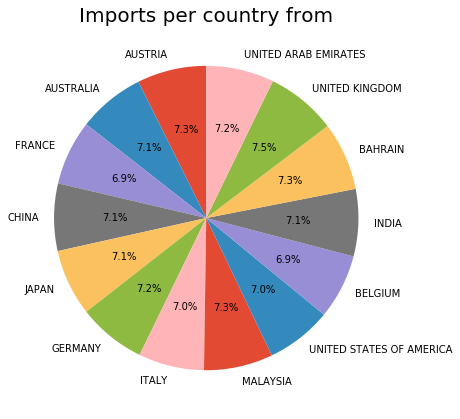

In [29]:
countries=imports['Country Code Eng'].unique()
d=imports.groupby('Country Code Eng')[['Bill Harm Code']].count()
d.columns=['nc']
s=d['nc']
plt.pie(s, labels=countries, startangle=90, autopct='%.1f%%')
plt.title('Imports per country from', fontsize = 20)
plt.show()


  Imp Municip Code activity_code  DOMAIN  Bill Year Month Name  \
0       IN-1001497       2200976  METALS       2016    January   
1       IN-1001497       2200976  METALS       2016    January   
2       IN-1001497       2200976  METALS       2016    January   
3       IN-1001497       2200976  METALS       2016    January   
4       IN-1001497       2200976  METALS       2016    January   

  Bill Type Desc Eng      Country Code Eng     Bill Cntry To Eng  \
0             Export  UNITED ARAB EMIRATES                FRANCE   
1             Export  UNITED ARAB EMIRATES               GERMANY   
2             Export  UNITED ARAB EMIRATES                FRANCE   
3             Export  UNITED ARAB EMIRATES                 JAPAN   
4             Export  UNITED ARAB EMIRATES  UNITED ARAB EMIRATES   

   Bill Harm Code                                  Sit Full Desc Eng  \
0          760691  Aluminium; plates, sheets and strip, thickness...   
1          721020  Iron or non-alloy steel; flat-r

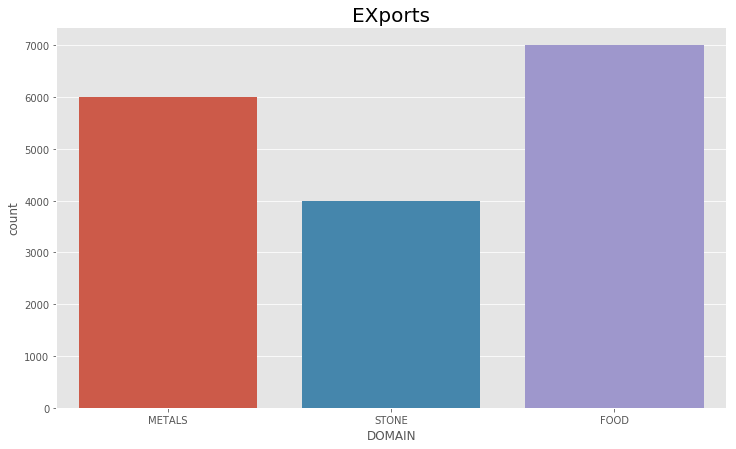

In [31]:
df=pd.merge(companies, exports, on='Imp Municip Code')
df=df.drop(['Imp Desc Eng_x', 'id'],axis=1)
df.to_csv('new1.csv')
print(df.head())
print(df.shape)
print(df.describe())

print(df['DOMAIN'].unique())
print(df.groupby('DOMAIN').size())
sns.countplot(df['DOMAIN'],label="Count")
plt.title('EXports', fontsize = 20)

plt.show()

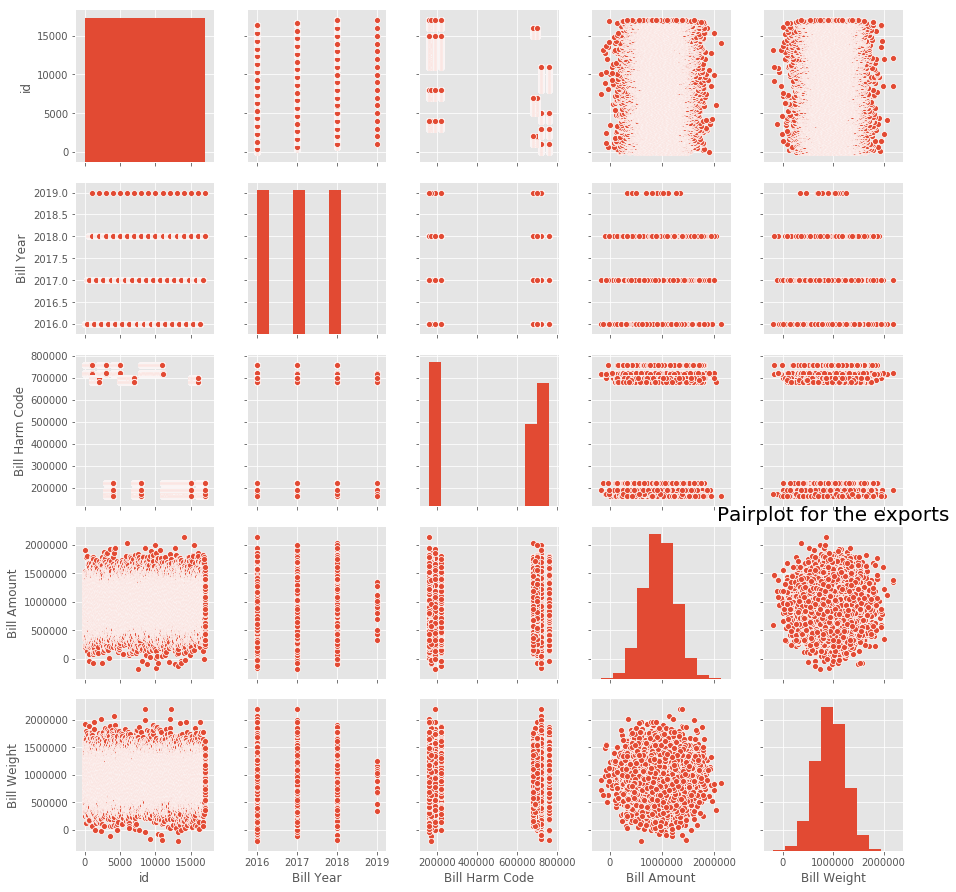

In [32]:
sns.pairplot(exports)
plt.title('Pairplot for the exports', fontsize = 20)
plt.show()

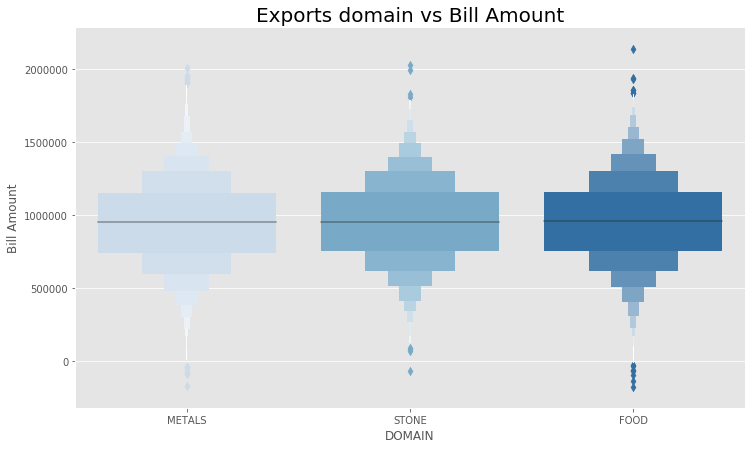

In [33]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.boxenplot(df['DOMAIN'], df['Bill Amount'], palette = 'Blues')
plt.title('Exports domain vs Bill Amount', fontsize = 20)
plt.show()

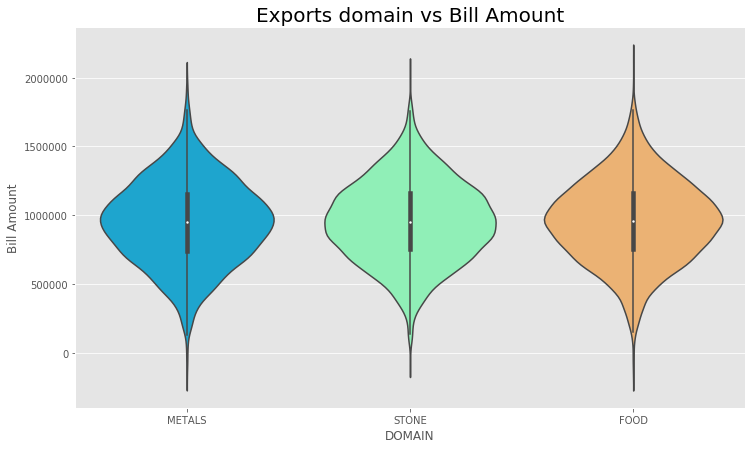

In [34]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.violinplot(df['DOMAIN'], df['Bill Amount'], palette = 'rainbow')
plt.title('Exports domain vs Bill Amount', fontsize = 20)
plt.show()

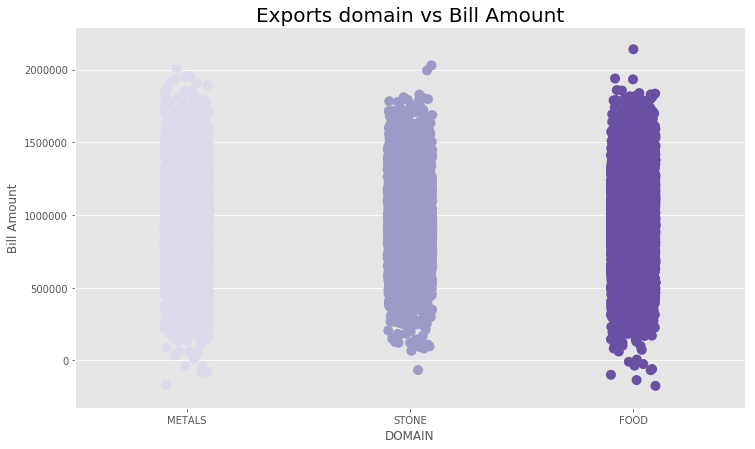

In [35]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.stripplot(df['DOMAIN'], df['Bill Amount'], palette = 'Purples', size = 10)
plt.title('Exports domain vs Bill Amount', fontsize = 20)
plt.show()


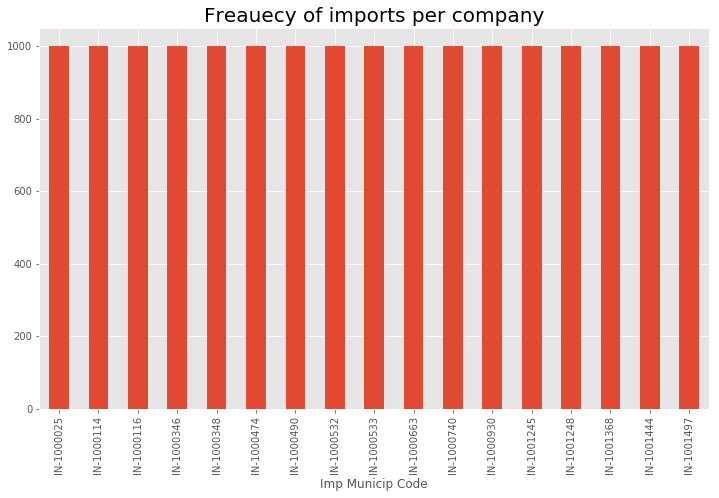

In [36]:
exports.groupby('Imp Municip Code')['Bill Harm Code'].count().plot(kind='bar')
plt.title('Freauecy of imports per company', fontsize = 20)
plt.show()

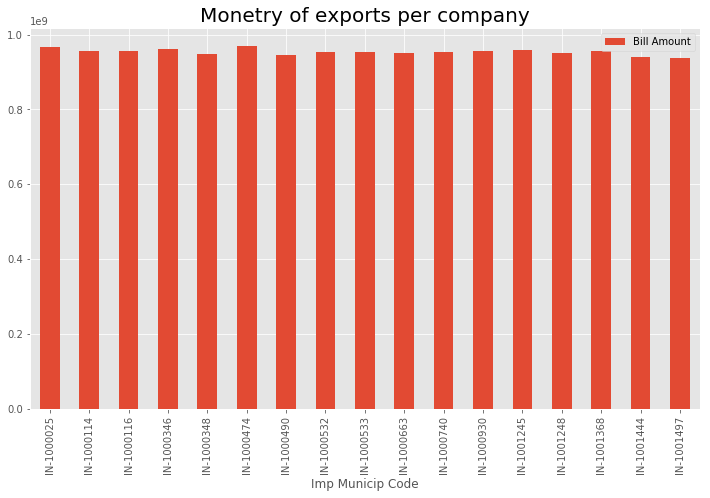

In [37]:
exports.groupby('Imp Municip Code')[['Bill Amount']].sum().plot(kind='bar')
monetrye=exports.groupby('Imp Municip Code')[['Bill Amount']].sum()
monetrye.columns=['Monetrye']
plt.title('Monetry of exports per company', fontsize = 20)
plt.show()

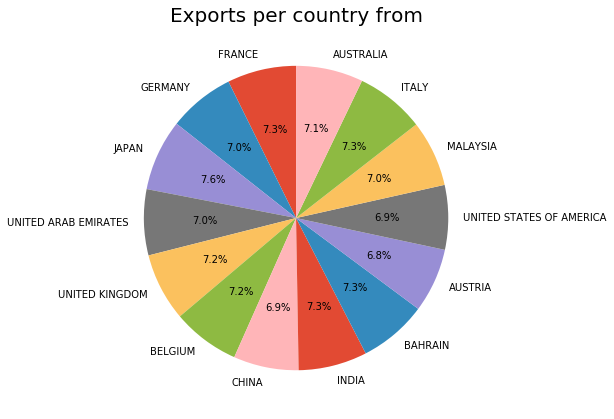

In [38]:
countries=exports['Bill Cntry To Eng'].unique()
d=exports.groupby('Bill Cntry To Eng')[['Bill Harm Code']].count()
d.columns=['nc']
s=d['nc']
plt.pie(s, labels=countries, startangle=90, autopct='%.1f%%')
plt.title('Exports per country from', fontsize = 20)
plt.show()

In [41]:
frequency_df = exports.groupby(by=['Imp Desc Eng'], as_index=False)['id'].count()

frequency_df.columns = ['customer_id','Frequency']



frequency_df_imp = imports.groupby(by=['Imp Desc Eng'], as_index=False)['id'].count()

frequency_df_imp.columns = ['customer_id','Frequency']



monetary_df = exports.groupby(by='Imp Desc Eng',as_index=False).agg({'Bill Amount': 'sum'})
monetary_df.columns = ['customer_id','Monetary']


monetary_df_imp = imports.groupby(by='Imp Desc Eng',as_index=False).agg({'Bill Amount': 'sum'})
monetary_df_imp.columns = ['customer_id','Monetary']


In [43]:
s=imports.groupby(by=['Imp Desc Eng','Bill Year','Month Name'], as_index=False)['id'].count()

ss=exports.groupby(by=['Imp Desc Eng','Bill Year','Month Name'], as_index=False)['id'].count()


In [44]:
ss['Date']='01 '+ss['Month Name'].map(str)+','+ss['Bill Year'].map(str)

from datetime import datetime

for i in ss.index.values:
    d=datetime.strptime(ss.loc[i,'Date'], '%d %B,%Y')
    ss.loc[i,'Date']=d.strftime('%Y-%m')


In [48]:
ss['Date']=pd.to_datetime(ss['Date'])
import datetime as dt
now = dt.date(2019,1,9)

recency_df =ss.groupby(by='Imp Desc Eng', as_index=False)['Date'].max()
recency_df.columns = ['customer_id','LastPurshaceDate']
h=recency_df[recency_df['LastPurshaceDate']==recency_df['LastPurshaceDate'].max()]['customer_id']

recency_df['date']=pd.DatetimeIndex(recency_df['LastPurshaceDate']).date
last_date = recency_df['LastPurshaceDate'].max().date()
recency_df['Recency'] = recency_df['date'].apply(lambda x: (now  - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)



In [49]:
df=recency_df.merge(frequency_df,on='customer_id')

df_=df.merge(monetary_df,on='customer_id')

In [52]:
df_.drop('date',axis=1,inplace=True)

In [54]:
df_

,customer_id,Recency,Frequency,Monetary
0,ABNIA CEMENT PRODUCTS LLC,8,1000,955658616
1,ABU DHABI FERTELIZER INDUSTRIES CO WLL,8,1000,969155856
2,ABU DHABI VEGETABLE OIL CO LLC,8,1000,954655885
3,AL AIN FOOD BEVERAGES PJSC BRANCH 2,8,1000,951116250
4,AL AIN NATIONAL JUICE & REFRESHMENTS CO LLC,8,1000,955348710
5,AL JABER ALUMINUM EXTRUSION LLC,8,1000,947963898
6,AL MIMARI INDUSTRIAL CO LLC,8,1000,954129278
7,ALGHURAIR IRON & STEEL LIC,8,1000,951215271
8,ARABIAN CEMENT INDUSTRY LIC,8,1000,955148142
9,EMIRATES ALUMINUM COMPANY LIMITED PJSC,8,1000,937091463


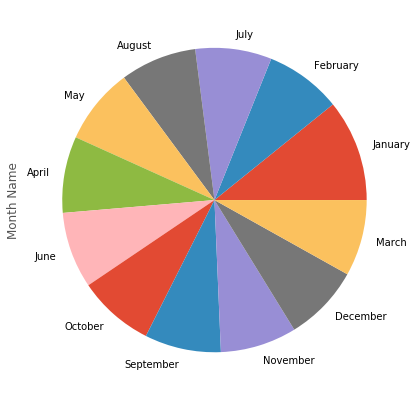

In [55]:
s[s['Imp Desc Eng']=='ABNIA CEMENT PRODUCTS LLC']['Month Name'].value_counts().plot.pie()


(array([1., 1., 1., 1., 2., 6., 2., 1., 0., 2.]),
 array([9.37091463e+08, 9.40297902e+08, 9.43504342e+08, 9.46710781e+08,
        9.49917220e+08, 9.53123660e+08, 9.56330099e+08, 9.59536538e+08,
        9.62742977e+08, 9.65949417e+08, 9.69155856e+08]),
 <a list of 10 Patch objects>)

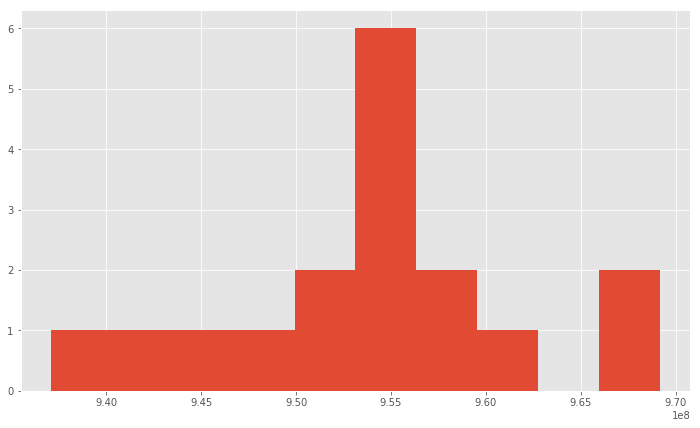

In [58]:

plt.hist(df_['Monetary'])
